In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import warnings
from pylab import rcParams
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [42]:
rcParams['figure.figsize'] = 14, 7
warnings.filterwarnings("ignore")

# Setup Data

In [43]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [44]:
X_train.shape

(60000, 28, 28)

In [45]:
X_train = X_train.reshape((X_train.shape[0], 
                           X_train.shape[1], 
                           X_train.shape[2], 
                           1))
X_train = X_train/ 255.0

In [46]:
X_test = X_test.reshape((X_test.shape[0], 
                         X_test.shape[1], 
                         X_test.shape[2], 1))
X_test = X_test/ 255.0

In [48]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# First Model

In [49]:
model_1 = Sequential()
model_1.add(Conv2D(32, (3,3), activation="relu"))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(64, (3,3), activation="relu"))
model_1.add(MaxPooling2D((2, 2)))
model_1.add(Conv2D(64, (3,3), activation="relu"))
model_1.add(Flatten())
model_1.add(Dense(64, activation="relu"))
model_1.add(Dense(10, activation="softmax"))
model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [50]:
batch_size = 128
epochs = 5

In [51]:
model_1_history = model_1.fit(X_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(X_test, y_test))

Epoch 1/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2422 - accuracy: 0.9293 - val_loss: 0.0567 - val_accuracy: 0.9836
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0583 - accuracy: 0.9819 - val_loss: 0.0350 - val_accuracy: 0.9888
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0416 - accuracy: 0.9869 - val_loss: 0.0298 - val_accuracy: 0.9898
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0325 - accuracy: 0.9893 - val_loss: 0.0317 - val_accuracy: 0.9899
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0263 - accuracy: 0.9917 - val_loss: 0.0297 - val_accuracy: 0.9900


# Model with Batch Normalization

In [52]:
model_2 = Sequential()
model_2.add(Conv2D(32, (3,3), activation="relu"))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Conv2D(64, (3,3), activation="relu"))
model_2.add(MaxPooling2D((2, 2)))
model_2.add(Conv2D(64, (3,3), activation="relu"))
model_2.add(Flatten())
model_2.add(Dense(64))
model_2.add(BatchNormalization())
model_2.add(Activation("relu"))
model_2.add(Dense(10))
model_2.add(BatchNormalization())
model_2.add(Activation("softmax"))

model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [53]:
model_2_history = model_2.fit(X_train, y_train,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(X_test, y_test))

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.3604 - accuracy: 0.9630 - val_loss: 0.3049 - val_accuracy: 0.9866
Epoch 2/5
469/469 [==============================] - 3s 5ms/step - loss: 0.1420 - accuracy: 0.9888 - val_loss: 0.0891 - val_accuracy: 0.9910
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0868 - accuracy: 0.9919 - val_loss: 0.0760 - val_accuracy: 0.9887
Epoch 4/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0584 - accuracy: 0.9940 - val_loss: 0.0469 - val_accuracy: 0.9930
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0423 - accuracy: 0.9954 - val_loss: 0.0553 - val_accuracy: 0.9917


# Visualize Performance

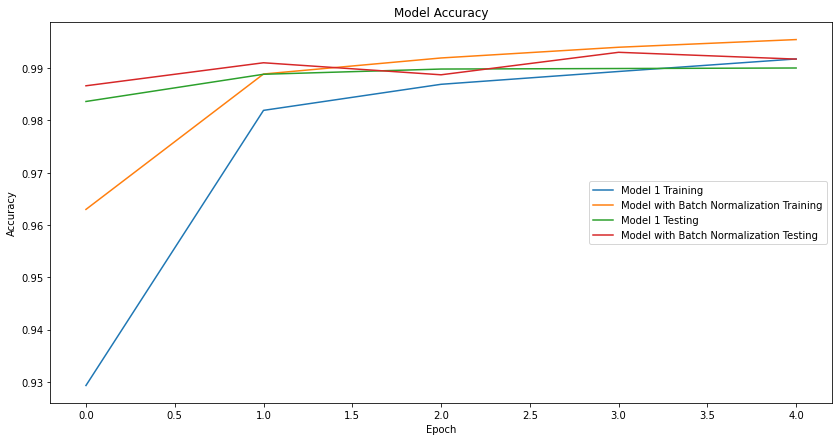

In [54]:
plt.plot(model_1_history.history['accuracy'])
plt.plot(model_2_history.history['accuracy'])
plt.plot(model_1_history.history['val_accuracy'])
plt.plot(model_2_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model 1 Training','Model with Batch Normalization Training', 
            'Model 1 Testing', 'Model with Batch Normalization Testing'],
           loc='center right')